<a href="https://colab.research.google.com/github/PankajVaishanavaa/Birthday-Wishes/blob/Master/Forest_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

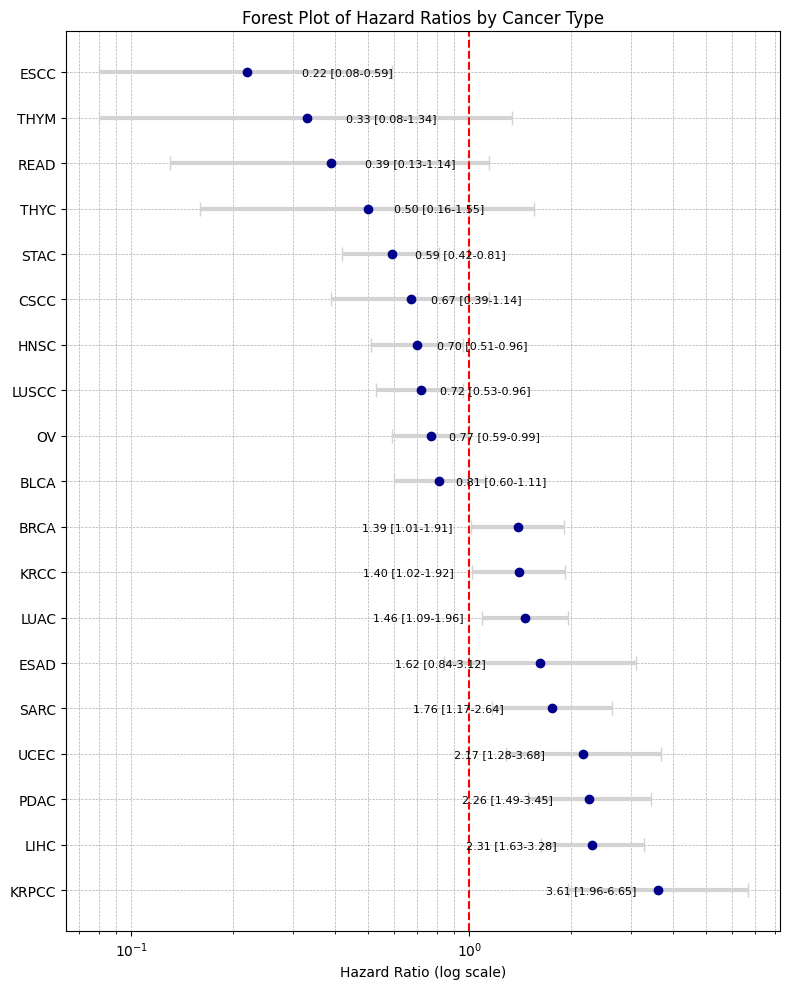

In [1]:
# Install required packages if not already installed
!pip install matplotlib pandas --quiet

import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "Cancer": ["ESCC", "THYM", "READ", "THYC", "STAC", "CSCC", "HNSC", "LUSCC", "OV", "BLCA",
               "BRCA", "KRCC", "LUAC", "ESAD", "SARC", "UCEC", "PDAC", "LIHC", "KRPCC"],
    "Hazard_ratio": [0.22, 0.33, 0.39, 0.5, 0.59, 0.67, 0.7, 0.72, 0.77, 0.81,
                     1.39, 1.4, 1.46, 1.62, 1.76, 2.17, 2.26, 2.31, 3.61],
    "Lower_CI": [0.08, 0.08, 0.13, 0.16, 0.42, 0.39, 0.51, 0.53, 0.59, 0.6,
                 1.01, 1.02, 1.09, 0.84, 1.17, 1.28, 1.49, 1.63, 1.96],
    "Upper_CI": [0.59, 1.34, 1.14, 1.55, 0.81, 1.14, 0.96, 0.96, 0.99, 1.11,
                 1.91, 1.92, 1.96, 3.12, 2.64, 3.68, 3.45, 3.28, 6.65],
    "p_value": [0.001, 0.1, 0.074, 0.22, 0.0012, 0.14, 0.025, 0.024, 0.045, 0.19,
                0.044, 0.036, 0.0098, 0.14, 0.0056, 0.0033, 0.001, 0.001, 0.001]
}

df = pd.DataFrame(data)
df.sort_values("Hazard_ratio", inplace=True)
df.reset_index(drop=True, inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(8, 10))
y_pos = range(len(df))
ax.errorbar(df["Hazard_ratio"], y_pos, xerr=[df["Hazard_ratio"] - df["Lower_CI"],
                                             df["Upper_CI"] - df["Hazard_ratio"]],
            fmt='o', color='darkblue', ecolor='lightgray', elinewidth=3, capsize=5)

# Add reference line at HR = 1
ax.axvline(1, color='red', linestyle='--')

# Set y-axis
ax.set_yticks(y_pos)
ax.set_yticklabels(df["Cancer"])
ax.invert_yaxis()

# Annotate with HR and CI
for i in range(len(df)):
    hr = df.loc[i, "Hazard_ratio"]
    ci_low = df.loc[i, "Lower_CI"]
    ci_up = df.loc[i, "Upper_CI"]
    p = df.loc[i, "p_value"]
    ax.text(hr + 0.1 if hr < 1 else hr - 0.5, i, f"{hr:.2f} [{ci_low:.2f}-{ci_up:.2f}]",
            va='center', ha='left' if hr < 1 else 'right', fontsize=8)

# Labels and layout
ax.set_xlabel("Hazard Ratio (log scale)")
ax.set_title("Forest Plot of Hazard Ratios by Cancer Type")
ax.set_xscale("log")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()